In [28]:
#Importieren der Abhängigkeiten
#import quandl
import numpy as np                                     #Arrays

from sklearn.linear_model import LinearRegression      #Lineare Regression 
from sklearn.svm import SVR                            #Lineare Support Vector Machine
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt                        #Darstellung von Daten
from matplotlib import style

from pandas_datareader import data                     #Datenleser zum lesen aus Yahoo Finance

In [29]:
style.use('ggplot')
#quandl.ApiConfig.api_key = "bUDmt8vrvZwCC1zuAsDe"

In [30]:

#Daten von Yahoo abfragen

#df = quandl.get("WIKI/GOOGL")



df_nasdaq_h = data.DataReader("^NDXT", 
                       start='2015-01-01', 
                       end='2019-11-05', 
                       data_source='yahoo')


#df_real = data.DataReader("GOOGL", 
                       #start='2019-11-04', 
                       #end='2019-12-10', 
                      # data_source='yahoo')
df_google_h = data.DataReader("GOOGL", 
                       start='2015-01-01', 
                       end='2019-11-05', 
                       data_source='yahoo')
# Take a look at the data
df_google_h.head(5)

High         Low        Open       Close   Volume  \
Date                                                                  
2015-01-02  535.799988  527.880005  532.599976  529.549988  1324000   
2015-01-05  527.989990  517.750000  527.150024  519.460022  2059100   
2015-01-06  521.210022  505.549988  520.500000  506.640015  2722800   
2015-01-07  511.489990  503.649994  510.950012  505.149994  2345900   
2015-01-08  507.500000  495.019989  501.510010  506.910004  3652700   

             Adj Close  
Date                    
2015-01-02  529.549988  
2015-01-05  519.460022  
2015-01-06  506.640015  
2015-01-07  505.149994  
2015-01-08  506.910004

In [31]:
df_nasdaq_h.tail(10)

High          Low         Open        Close  Volume  \
Date                                                                     
2019-10-23  4801.390137  4753.520020  4764.370117  4780.899902  230900   
2019-10-24  4880.270020  4830.979980  4835.009766  4878.450195  255900   
2019-10-25  4931.839844  4882.029785  4883.370117  4923.939941  269200   
2019-10-28  4991.709961  4959.660156  4960.350098  4985.399902  274000   
2019-10-29  5002.669922  4956.959961  4993.979980  4958.129883  251400   
2019-10-30  4983.509766  4935.830078  4979.810059  4979.180176  255100   
2019-10-31  4961.990234  4898.259766  4960.720215  4932.700195  317300   
2019-11-01  5018.299805  4960.740234  4970.830078  5017.879883  305900   
2019-11-04  5092.470215  5064.200195  5074.049805  5086.830078  286200   
2019-11-05  5106.740234  5070.290039  5105.430176  5087.669922  272900   

              Adj Close  
Date                     
2019-10-23  4780.899902  
2019-10-24  4878.450195  
2019-10-25  4923.939941  
2019-10-28  4985.399902  
2019-10-29  4958.129883  
2019-10-30  4979.180176  
2019-10-31  4932.700195  
2019-11-01  5017.879883  
2019-11-04  5086.830078  
2019-11-05  5087.669922

In [32]:
df_google_h.tail(10)

High          Low         Open        Close   Volume  \
Date                                                                      
2019-10-23  1258.040039  1240.209961  1240.209961  1257.630005  1064100   
2019-10-24  1262.900024  1252.349976  1259.109985  1259.109985  1011200   
2019-10-25  1268.000000  1249.150024  1252.000000  1264.300049  1355200   
2019-10-28  1299.239990  1272.310059  1275.000000  1288.979980  3271400   
2019-10-29  1280.800049  1255.609985  1276.000000  1260.660034  2632700   
2019-10-30  1268.020020  1250.650024  1255.150024  1260.699951  1460200   
2019-10-31  1266.520020  1249.479980  1260.000000  1258.800049  1595000   
2019-11-01  1273.000000  1259.709961  1265.800049  1272.250000  1440600   
2019-11-04  1292.500000  1276.109985  1276.109985  1289.609985  1531600   
2019-11-05  1297.239990  1289.380005  1291.199951  1291.439941  1257100   

              Adj Close  
Date                     
2019-10-23  1257.630005  
2019-10-24  1259.109985  
2019-10-25  1264.300049  
2019-10-28  1288.979980  
2019-10-29  1260.660034  
2019-10-30  1260.699951  
2019-10-31  1258.800049  
2019-11-01  1272.250000  
2019-11-04  1289.609985  
2019-11-05  1291.439941

In [33]:
df_google_h['Adj Close'] = df_google_h['Adj Close'].diff(periods = -1)
df_google_h.dropna(inplace = True)

In [34]:
df_google_h.tail()

High          Low         Open        Close   Volume  \
Date                                                                      
2019-10-29  1280.800049  1255.609985  1276.000000  1260.660034  2632700   
2019-10-30  1268.020020  1250.650024  1255.150024  1260.699951  1460200   
2019-10-31  1266.520020  1249.479980  1260.000000  1258.800049  1595000   
2019-11-01  1273.000000  1259.709961  1265.800049  1272.250000  1440600   
2019-11-04  1292.500000  1276.109985  1276.109985  1289.609985  1531600   

            Adj Close  
Date                   
2019-10-29  -0.039917  
2019-10-30   1.899902  
2019-10-31 -13.449951  
2019-11-01 -17.359985  
2019-11-04  -1.829956

In [35]:
df_nasdaq_h['Adj Close'] = df_google_h['Adj Close'].diff(periods = -1)
df_nasdaq_h.dropna(inplace = True)

In [36]:
df_nasdaq_h.tail()

High          Low         Open        Close  Volume  \
Date                                                                     
2019-10-28  4991.709961  4959.660156  4960.350098  4985.399902  274000   
2019-10-29  5002.669922  4956.959961  4993.979980  4958.129883  251400   
2019-10-30  4983.509766  4935.830078  4979.810059  4979.180176  255100   
2019-10-31  4961.990234  4898.259766  4960.720215  4932.700195  317300   
2019-11-01  5018.299805  4960.740234  4970.830078  5017.879883  305900   

            Adj Close  
Date                   
2019-10-28  28.359863  
2019-10-29  -1.939819  
2019-10-30  15.349854  
2019-10-31   3.910034  
2019-11-01 -15.530029

In [37]:
df_google_h = df_google_h[['Adj Close']].where(df_google_h[['Adj Close']]>0)/df_nasdaq_h[['Adj Close']].where(df_nasdaq_h[['Adj Close']]>0)

In [38]:
df_google_h.rename(columns = {'Adj Close': 'Google/Nasdaq'}, inplace = True)

In [40]:
df_google_h.dropna(inplace=True)

#df_real = df_real[['Adj Close']]
#Take a look at the new data
df_google_h.tail(50)

Google/Nasdaq
Date                     
2019-04-08       0.597864
2019-04-23       0.591139
2019-04-29       1.358101
2019-04-30       1.361652
2019-05-01       0.228139
2019-05-06       2.239253
2019-05-07       1.533228
2019-05-08       1.133041
2019-05-10       1.607140
2019-05-13       0.203398
2019-05-17       0.711506
2019-05-22       2.780404
2019-05-23       0.876293
2019-05-28       0.930295
2019-05-31       0.811400
2019-06-04       0.759445
2019-06-11       0.140076
2019-06-13       0.382926
2019-06-18       0.077493
2019-06-24       1.332114
2019-06-25       2.033577
2019-06-26       0.374234
2019-07-05       0.679213
2019-07-16       0.930748
2019-07-18       0.671950
2019-07-23       1.836648
2019-07-24       0.033519
2019-07-29       3.425805
2019-07-30       2.899314
2019-08-02       0.717962
2019-08-08       5.982893
2019-08-09       0.393121
2019-08-13       0.864981
2019-08-19       0.677485
2019-08-22       0.683110
2019-08-26       0.109450
2019-08-30       0.622552
2019-09-05       1.217824
2019-09-06       0.709478
2019-09-13       1.263157
2019-09-16       0.387166
2019-09-19       0.647531
2019-09-23       0.372072
2019-09-26       1.417162
2019-10-01       0.709270
2019-10-07       0.596248
2019-10-17       1.015739
2019-10-21       0.157871
2019-10-28       0.998592
2019-10-30       0.123773

In [42]:
forecast_out = 30 #'n=30' Tage
#Create another column (the target or dependent variable) shifted 'n' units up
df_google_h['Prediction'] = df_google_h[['Google/Nasdaq']].shift(-forecast_out)
#print the new data set
df_google_h.tail()

Google/Nasdaq  Prediction
Date                                 
2019-10-07       0.596248         NaN
2019-10-17       1.015739         NaN
2019-10-21       0.157871         NaN
2019-10-28       0.998592         NaN
2019-10-30       0.123773         NaN

In [43]:
X = np.array(df_google_h.drop(['Prediction'],1))

#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

#X_real = df_real[['Adj Close']]

[[1.13151125e+00]
 [4.58463619e-01]
 [2.44664246e+00]
 [4.35715038e-01]
 [2.29389609e-01]
 [4.74009987e-02]
 [2.29395325e+00]
 [9.16319247e-01]
 [8.29459858e-01]
 [6.58735300e-01]
 [2.97157592e-01]
 [2.12387097e-01]
 [1.62269104e+00]
 [3.83116175e-01]
 [6.50715775e-01]
 [1.29204814e-01]
 [8.76674090e-01]
 [1.41228564e+00]
 [4.31534560e-01]
 [4.86019280e-01]
 [3.20351655e-01]
 [6.60471442e-01]
 [1.46796501e+00]
 [6.29131515e-01]
 [5.23585748e+00]
 [7.56006205e-01]
 [6.11961374e-01]
 [8.75498326e-01]
 [4.77625018e-01]
 [2.04578767e-01]
 [1.30224640e+00]
 [8.40775365e-01]
 [5.32585910e+00]
 [5.33512240e-01]
 [9.02688340e-01]
 [9.37719113e-01]
 [5.09382184e-01]
 [6.94900812e-01]
 [2.49997881e+00]
 [1.27906887e+00]
 [1.12245428e-01]
 [7.05046499e-01]
 [1.14761746e+00]
 [1.11415328e+00]
 [2.70696506e-01]
 [2.80589436e-01]
 [7.38474774e-01]
 [1.21935128e-02]
 [7.29820112e-01]
 [4.96787734e+01]
 [8.50809641e-01]
 [4.94398687e-01]
 [2.22651512e-01]
 [1.27716126e+00]
 [4.39986336e-02]
 [6.342704

In [44]:

### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df_google_h['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)

[1.30224640e+00 8.40775365e-01 5.32585910e+00 5.33512240e-01
 9.02688340e-01 9.37719113e-01 5.09382184e-01 6.94900812e-01
 2.49997881e+00 1.27906887e+00 1.12245428e-01 7.05046499e-01
 1.14761746e+00 1.11415328e+00 2.70696506e-01 2.80589436e-01
 7.38474774e-01 1.21935128e-02 7.29820112e-01 4.96787734e+01
 8.50809641e-01 4.94398687e-01 2.22651512e-01 1.27716126e+00
 4.39986336e-02 6.34270461e-01 5.03274430e-01 3.71986320e+00
 1.27810683e+00 1.06596315e-01 5.43291215e-01 3.51585565e-01
 5.77429199e-02 1.83409413e-01 6.39500390e-01 9.93513609e-01
 1.11500796e+00 9.42535832e-02 4.14365200e-01 1.79570571e-01
 1.69787338e+00 4.67502505e-01 4.18865105e-01 6.61820892e-01
 6.13950894e-01 2.40389540e-01 4.08682453e-03 1.05522305e+00
 1.20129999e-01 3.03393076e-01 4.67084991e-01 7.43129033e-01
 1.24900848e+00 4.42502274e-01 1.29285355e-01 7.66686375e-01
 1.40009986e-01 8.98837202e-01 2.22451927e+00 8.23671558e-01
 6.85554699e-01 7.08714414e-01 6.02571538e-02 9.85846564e-01
 3.45407725e-01 2.588668

In [45]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  -0.05230836076666168


In [48]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  -0.08979362289882187


In [50]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df_google_h.drop(['Prediction'],1))[-forecast_out:]
x_forecast

array([[2.03357724],
       [0.37423396],
       [0.67921307],
       [0.93074764],
       [0.67195031],
       [1.8366478 ],
       [0.03351938],
       [3.4258045 ],
       [2.89931383],
       [0.71796229],
       [5.98289262],
       [0.39312101],
       [0.86498119],
       [0.67748483],
       [0.68311043],
       [0.10944978],
       [0.62255225],
       [1.21782404],
       [0.70947785],
       [1.26315693],
       [0.38716647],
       [0.64753109],
       [0.37207178],
       [1.41716161],
       [0.70926952],
       [0.59624832],
       [1.01573907],
       [0.1578707 ],
       [0.99859248],
       [0.12377332]])

In [51]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
lr_prediction

# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
svm_prediction

array([0.86945177, 0.67988644, 0.60326016, 0.61957155, 0.60371   ,
       0.85026466, 0.93302312, 0.51599519, 0.70806232, 0.60183969,
       0.1705988 , 0.67136009, 0.60999291, 0.60336184, 0.60304307,
       0.85967028, 0.60837876, 0.68944171, 0.60201224, 0.70290849,
       0.67398968, 0.60566219, 0.68089725, 0.74952992, 0.60201744,
       0.61205257, 0.63626166, 0.81807717, 0.6325491 , 0.84694842])

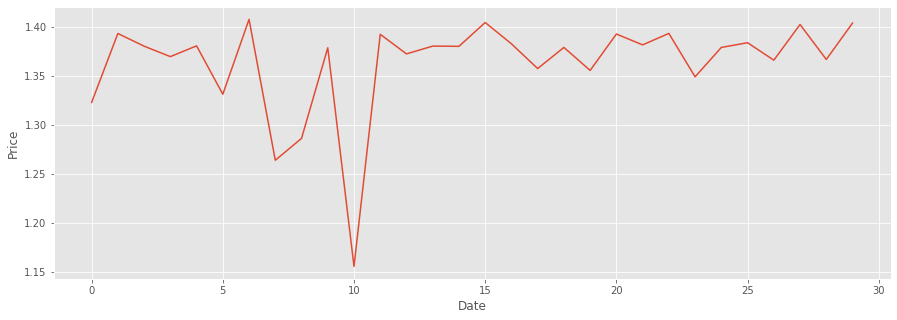

In [52]:
plt.figure(figsize=(15,5))
#plt.axis(xmax=60)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(lr_prediction)


NameError: name 'X_real' is not defined

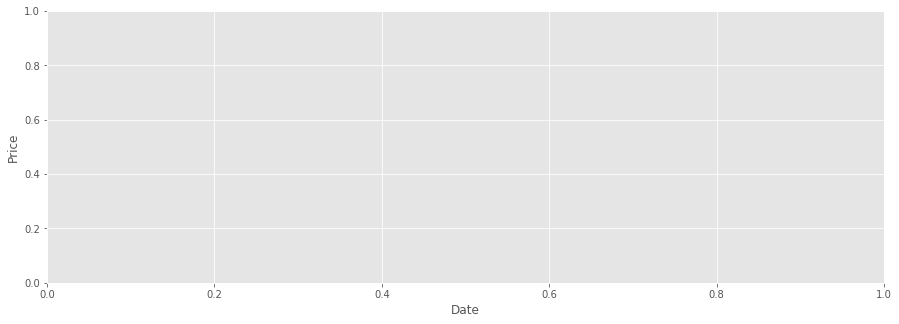

In [53]:
plt.figure(figsize=(15,5))
#plt.axis(ymax=1320)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(X_real)

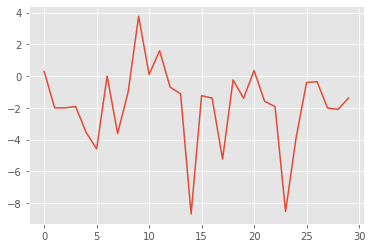

In [27]:
plt.plot(svm_prediction)